In [1]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np
import seaborn

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.columns

Index(['Unnamed: 0', 'problem_id', 'difficulty', 'quality', 'suggestion',
       'tags'],
      dtype='object')

# Histogram of total number of votes for each possible difficulty.

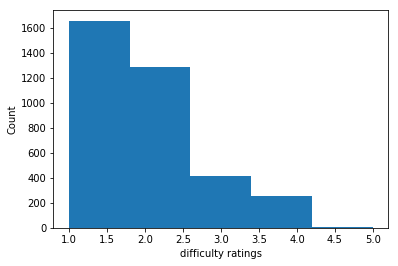

In [4]:
k=data["difficulty"].tolist()
difficulty_ratings = []
for i in k:
    difficulty_ratings.extend(ast.literal_eval(i))
plt.hist(difficulty_ratings,bins=5)
plt.xlabel("difficulty ratings")
plt.ylabel("Count")
plt.show()

# Histogram of total number of votes for each possible quality

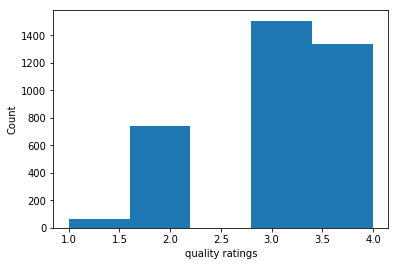

In [5]:
k=data["quality"].tolist()
quality_ratings = []
for i in k:
    quality_ratings.extend(ast.literal_eval(i))
plt.hist(quality_ratings,bins=5)
plt.xlabel("quality ratings")
plt.ylabel("Count")
plt.show()

# Histogram of total number of votes for each tag

In [60]:
k=data["tags"].tolist()
tags,tag_dict = [],{}
k1=0
for i in k:
    k1=ast.literal_eval(i)
    tags.extend(k1)
    for j in k1:
        tag_dict.setdefault(j,0)
        tag_dict[j]+=1

In [62]:
tags = []
tag_count = []
for each_tag in tag_dict.keys():
    tags.append(each_tag)
    tag_count.append(tag_dict[each_tag])

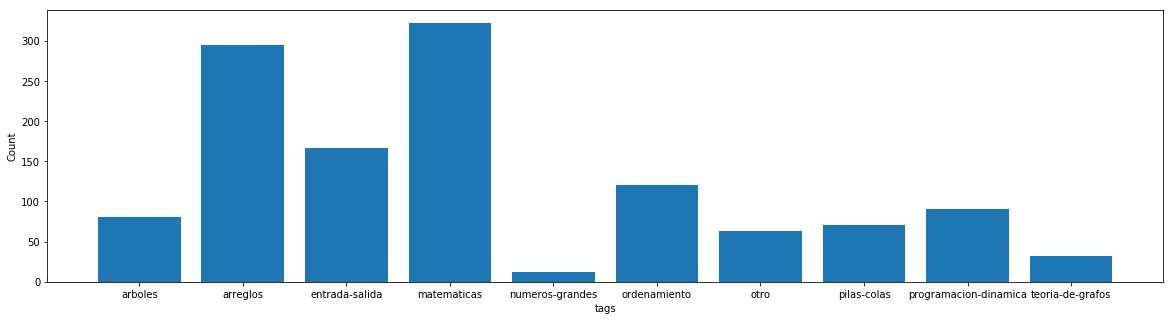

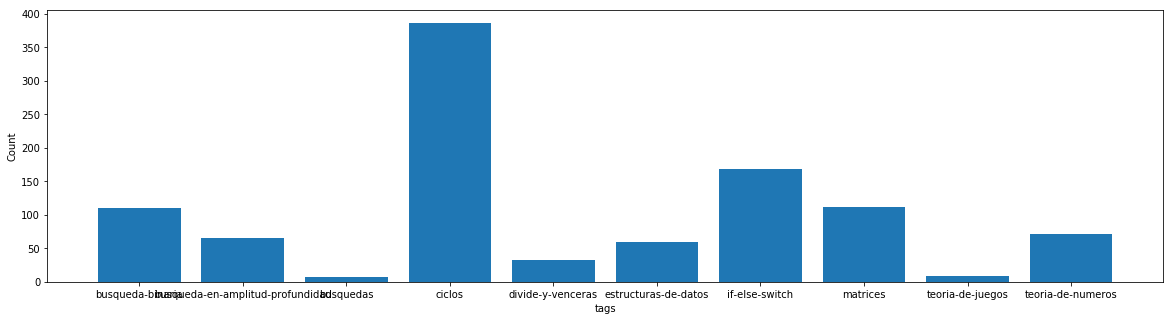

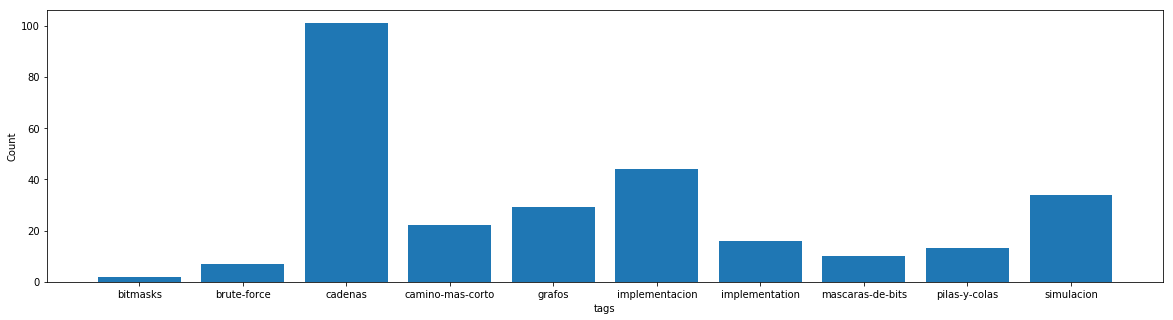

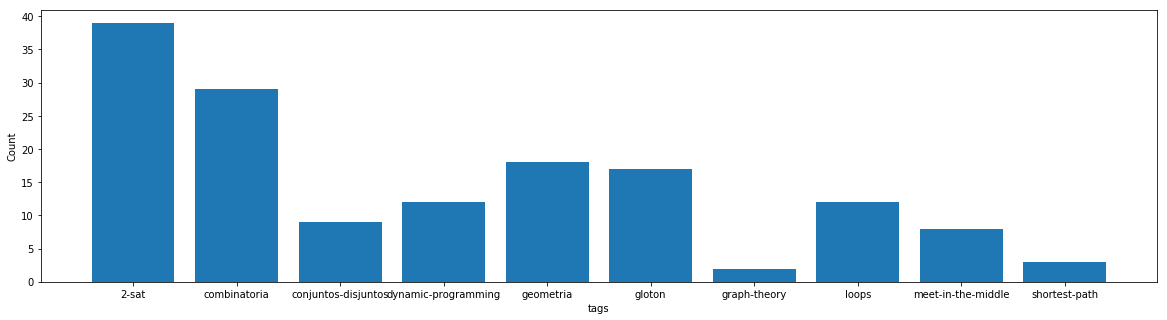

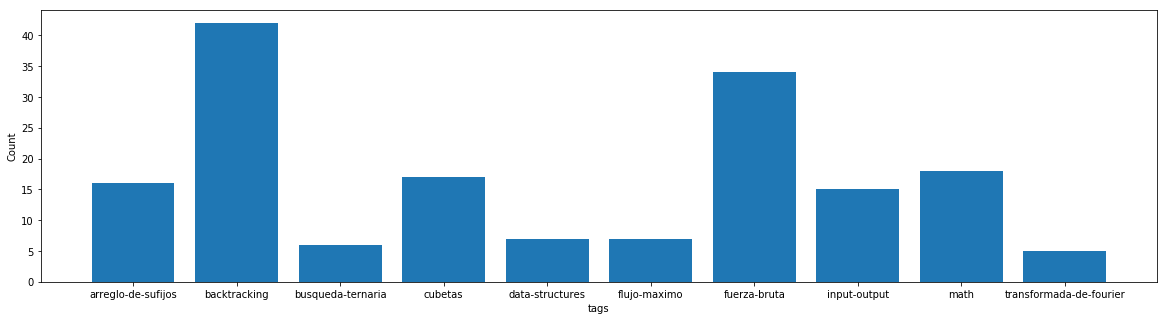

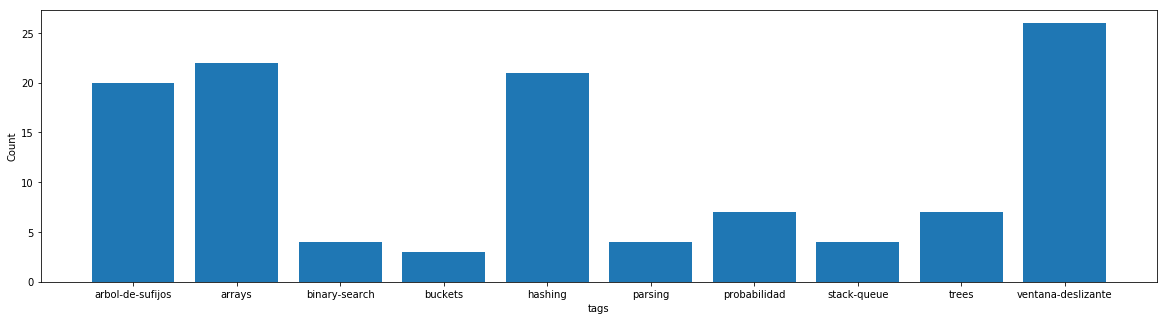

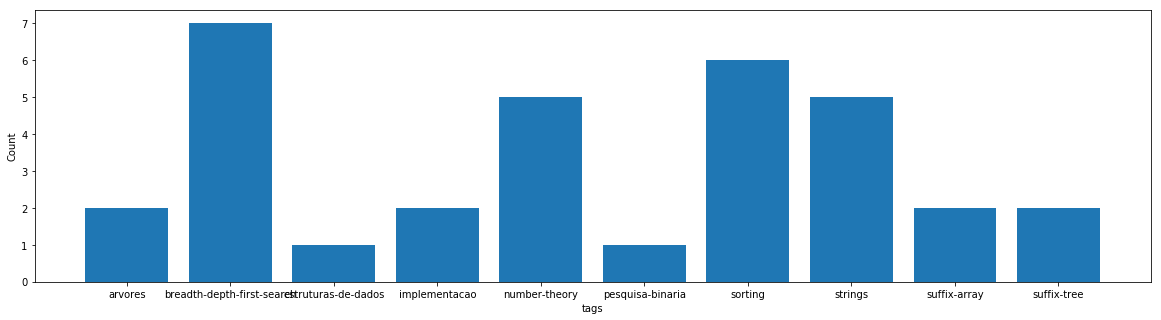

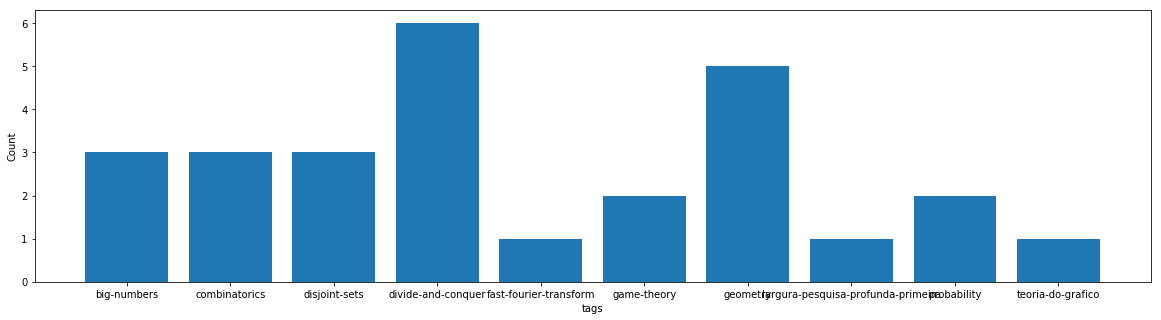

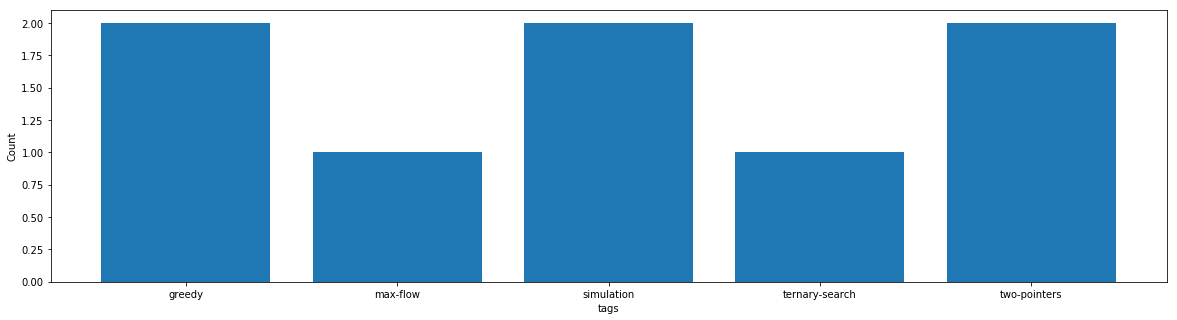

In [65]:
for i in range(0,85,10):
    fig1 = plt.figure(figsize=(20, 5))
    plt.bar(tags[i:i+10],tag_count[i:i+10])
    plt.xlabel("tags")
    plt.ylabel("Count")
plt.show()

In [10]:
import json
k=[]
with open("feedback.txt","r") as f:
    for i in f.readlines():
        k.append(json.loads(i))

In [13]:
data1={}
for each in k:
    if "tags" in each["contents"] and each["contents"]["tags"]:
        for each_tag in each["contents"]["tags"]:
            data1.setdefault(each_tag,{"difficulty":[],"quality":[]})
            if "difficulty" in each["contents"] and each["contents"]["difficulty"]:
                data1[each_tag]["difficulty"].append(each["contents"]["difficulty"])
            if "quality" in each["contents"] and each["contents"]["quality"]:
                data1[each_tag]["quality"].append(each["contents"]["quality"])
            
        

In [14]:
for each_tag in data1.keys():
    if data1[each_tag]["difficulty"]:
        data1[each_tag]["difficulty"] = sum(data1[each_tag]["difficulty"])/len(data1[each_tag]["difficulty"])
    if data1[each_tag]["quality"]:
        data1[each_tag]["quality"] = sum(data1[each_tag]["quality"])/len(data1[each_tag]["quality"])

In [15]:
tags = []
diff_rating = []
quality_rating = []
for each_tag in data1.keys():
    tags.append(each_tag)
    if data1[each_tag]["difficulty"]:
        diff_rating.append(data1[each_tag]["difficulty"])
    else:
        diff_rating.append(0)
    if data1[each_tag]["quality"]:
        quality_rating.append(data1[each_tag]["quality"])
    else:
        quality_rating.append(0)

# Histogram of average difficulty for each tag

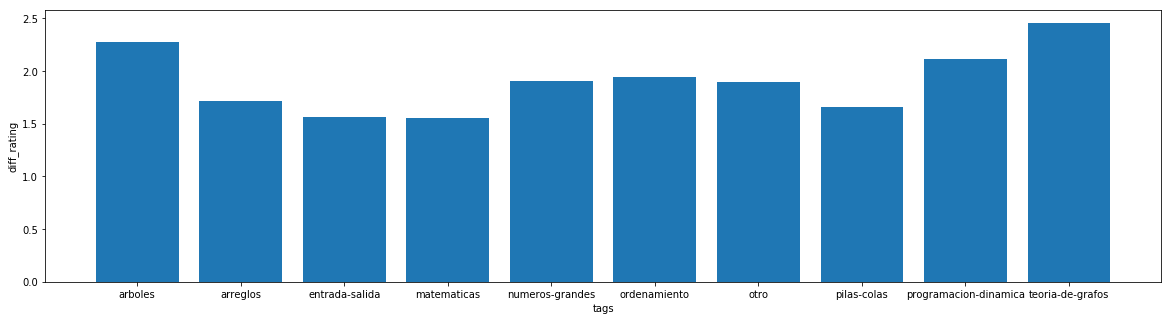

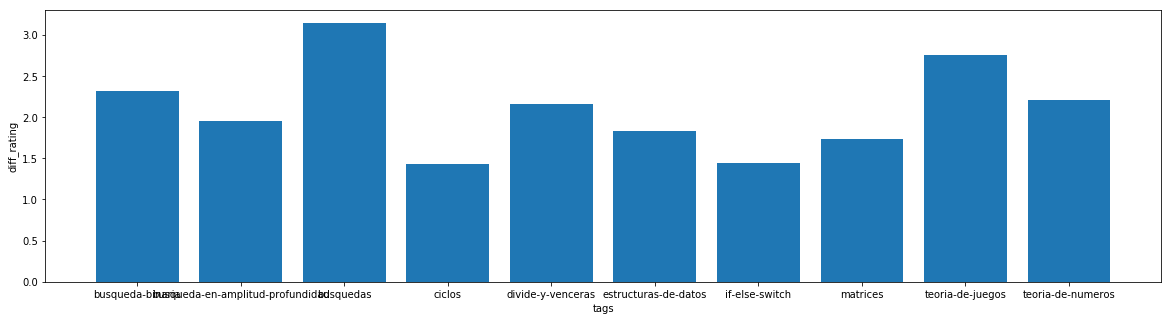

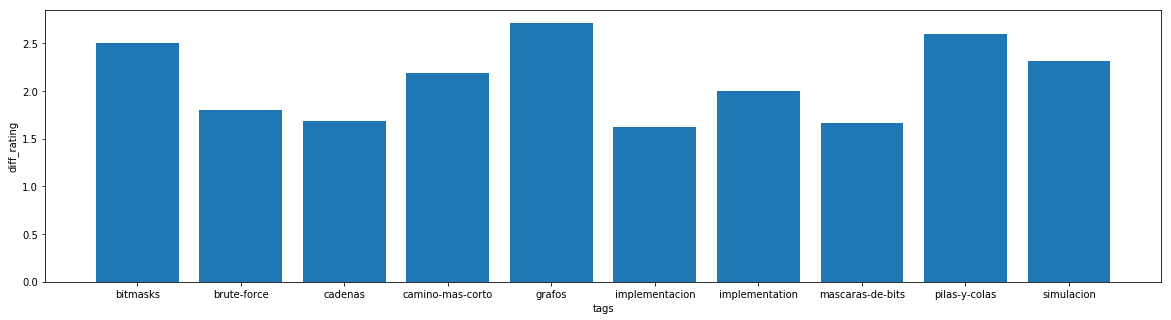

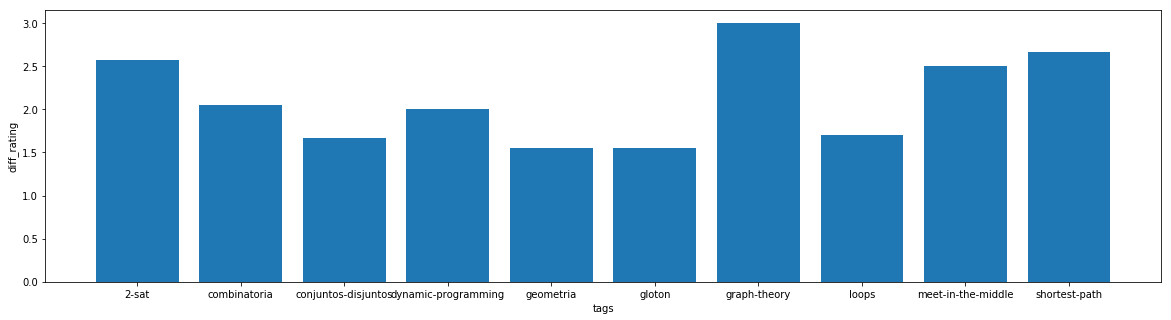

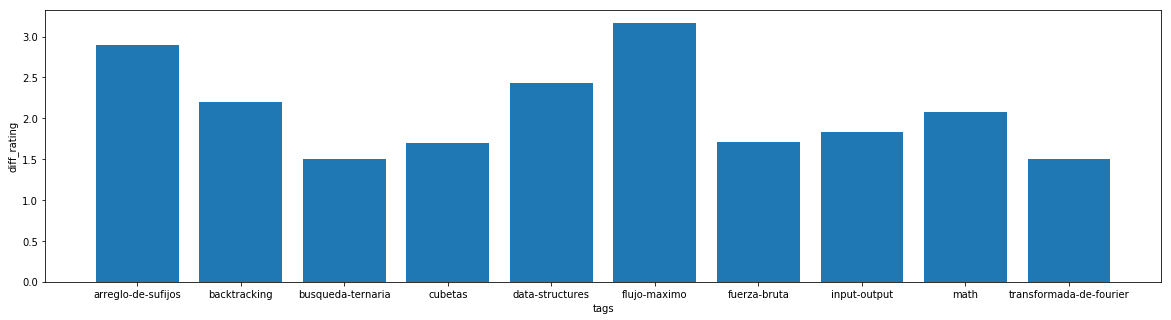

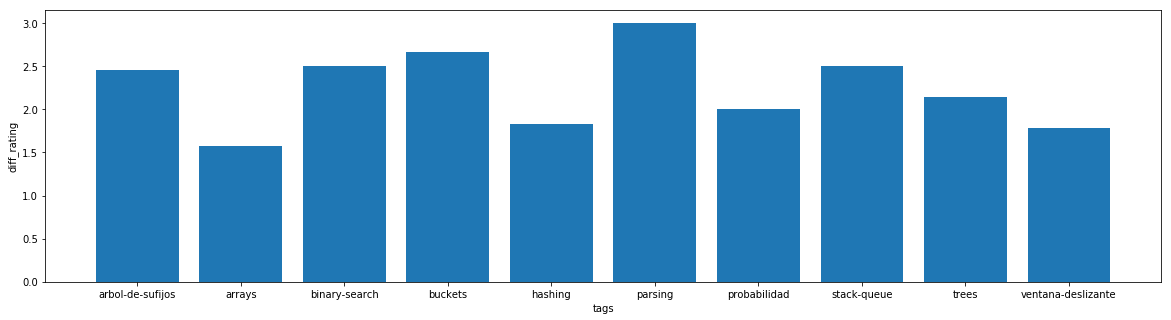

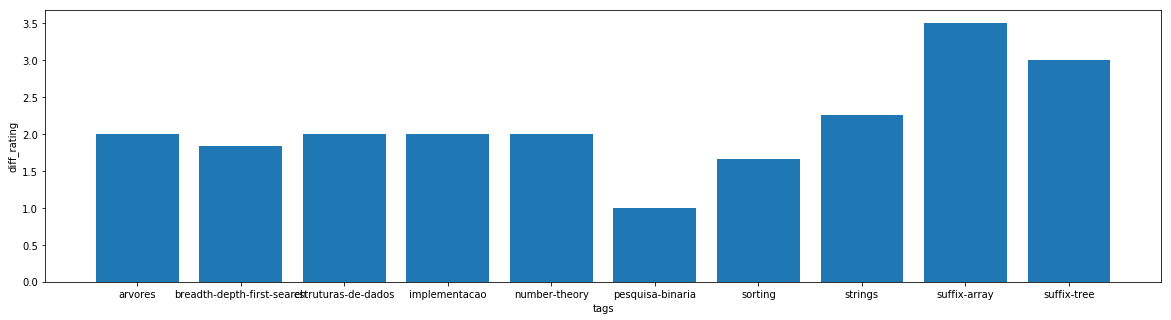

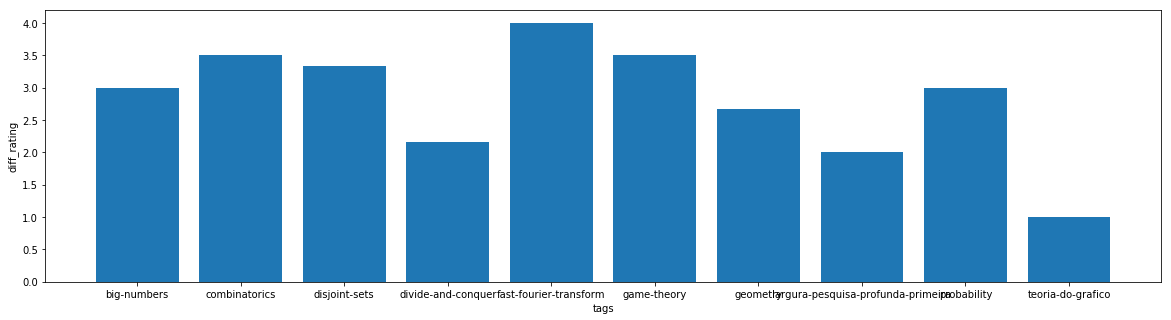

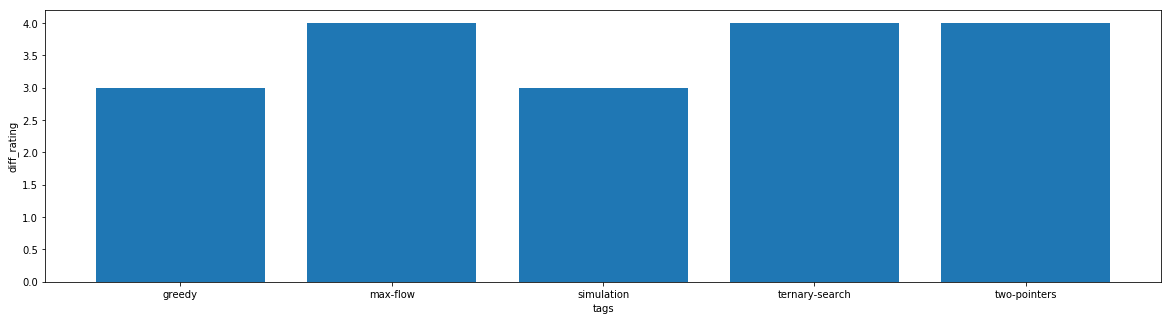

In [39]:
for i in range(0,85,10):
    fig1 = plt.figure(figsize=(20, 5))
    plt.bar(tags[i:i+10],diff_rating[i:i+10])
    plt.xlabel("tags")
    plt.ylabel("diff_rating")
plt.show()

# Histogram of average quality for each tag.

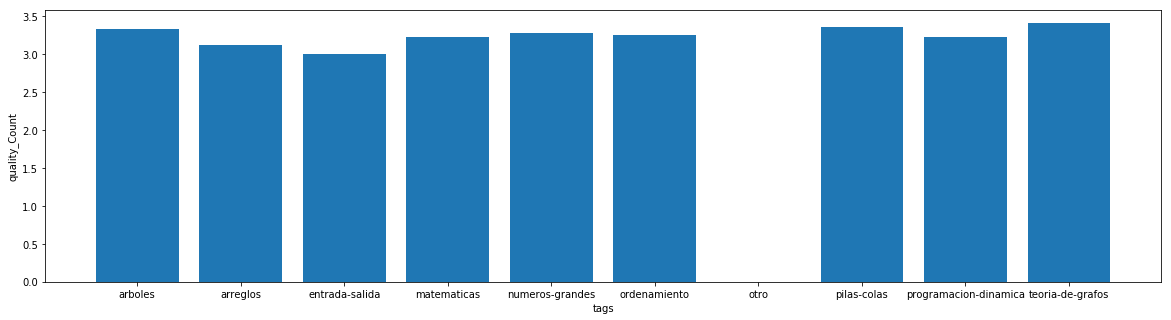

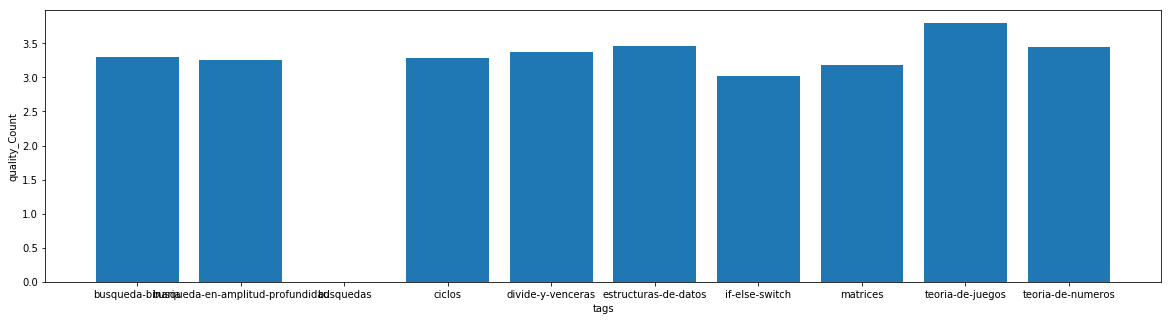

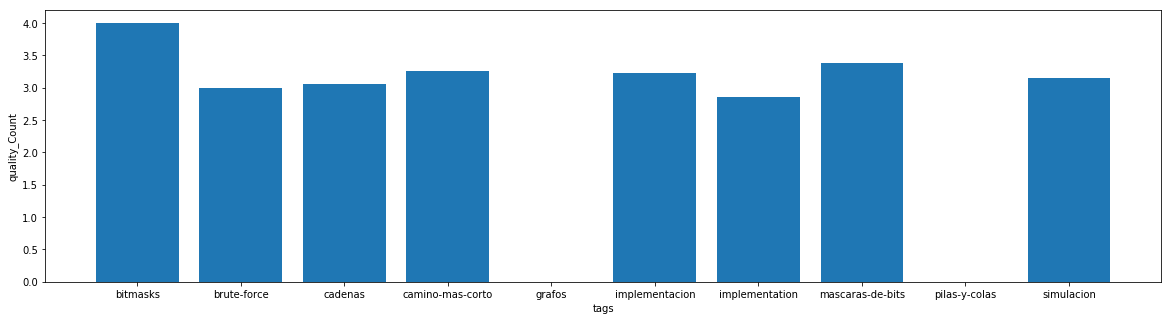

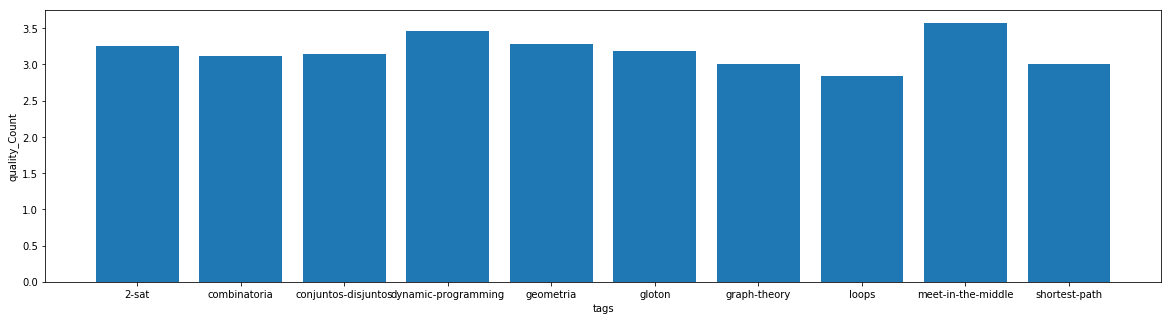

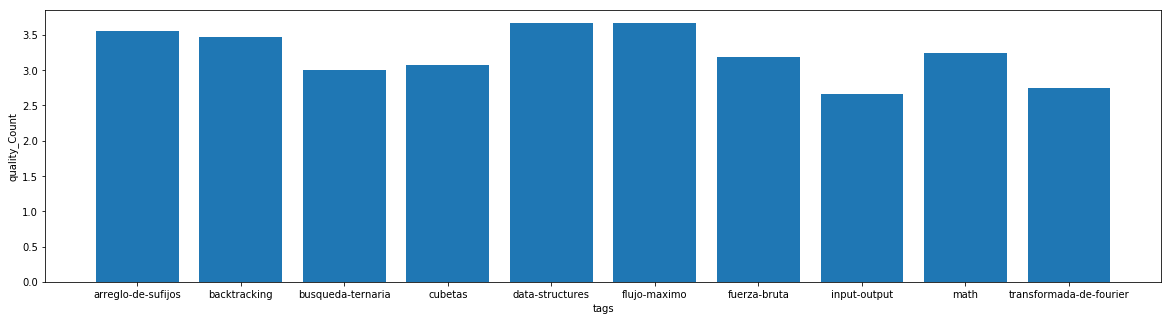

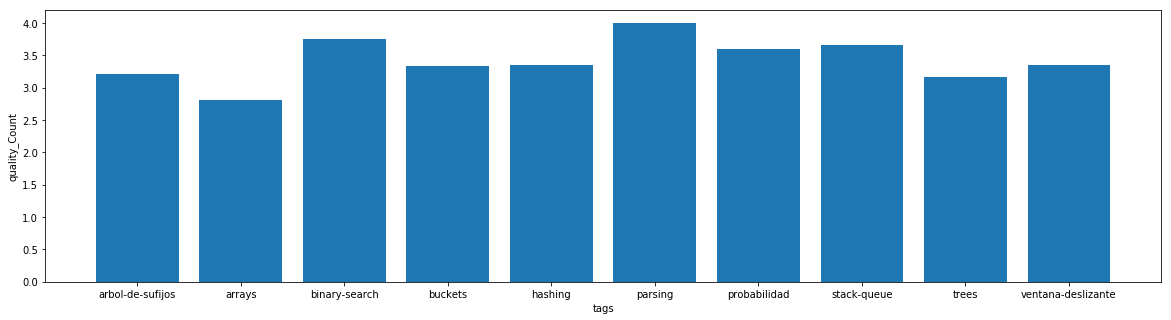

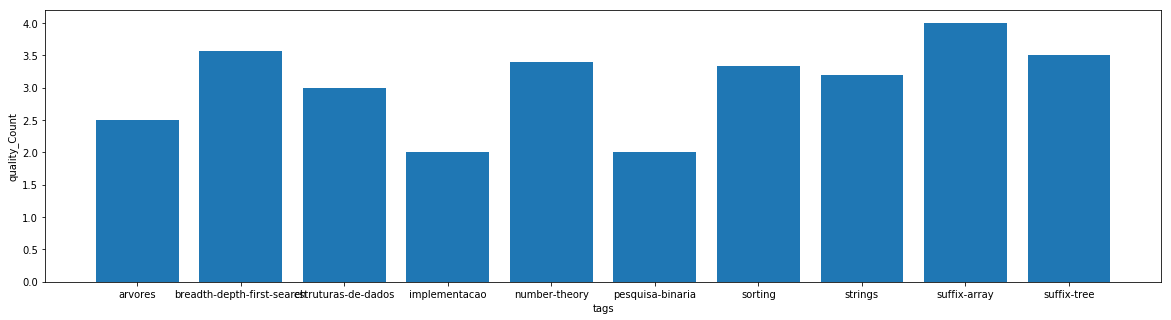

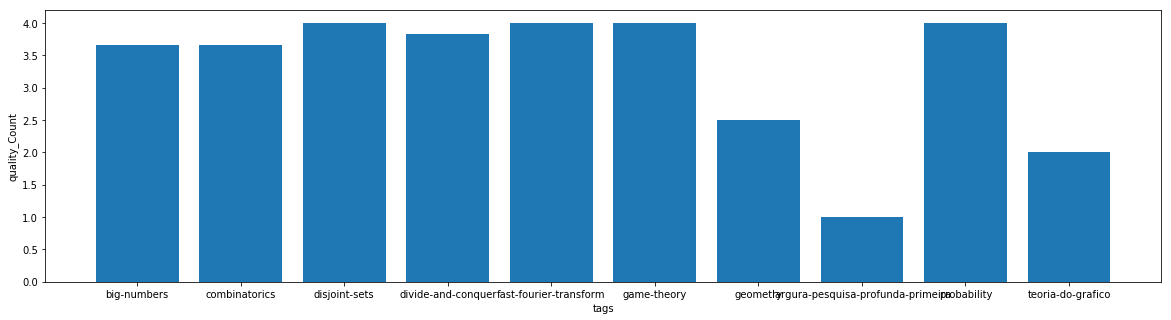

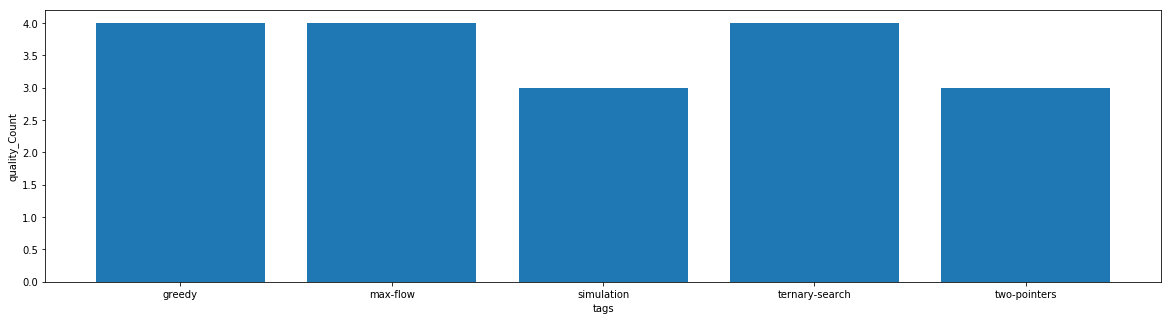

In [44]:
for i in range(0,85,10):
    fig1 = plt.figure(figsize=(20, 5))
    plt.bar(tags[i:i+10],quality_rating[i:i+10])
    plt.xlabel("tags")
    plt.ylabel("quality_Count")
plt.show()

# Histogram of number of problems with 1, 2, 3, ... feedback records.

In [13]:
no_of_problems_with_diff_rating = {}
no_of_problems_quality_rating = {}
for each_problem in k:
    if "difficulty" in each_problem["contents"] and each_problem["contents"]["difficulty"]:
        no_of_problems_with_diff_rating.setdefault(each_problem["contents"]["difficulty"],0)
        no_of_problems_with_diff_rating[each_problem["contents"]["difficulty"]]+=1
    if "quality" in each_problem["contents"] and each_problem["contents"]["quality"]:
        no_of_problems_quality_rating.setdefault(each_problem["contents"]["quality"],0)
        no_of_problems_quality_rating[each_problem["contents"]["quality"]]+=1

In [14]:
diff_rating,diff_rating_count,quality_rating,quality_rating_count = [],[],[],[]
for each_rating in no_of_problems_with_diff_rating.keys():
    diff_rating.append(each_rating)
    diff_rating_count.append(no_of_problems_with_diff_rating[each_rating])
    
for each_rating in no_of_problems_quality_rating.keys():
    quality_rating.append(each_rating)
    quality_rating_count.append(no_of_problems_quality_rating[each_rating])

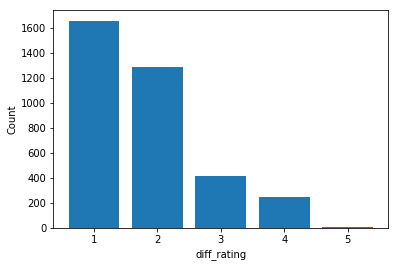

In [15]:
#Quality histogram
plt.bar(diff_rating,diff_rating_count)
plt.xlabel("diff_rating")
plt.ylabel("Count")
plt.show()

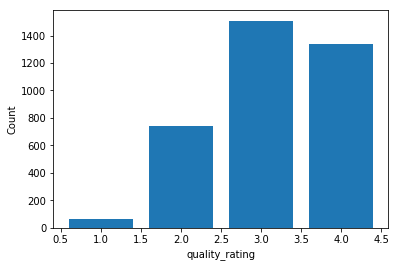

In [16]:
#difficulty histogram
plt.bar(quality_rating,quality_rating_count)
plt.xlabel("quality_rating")
plt.ylabel("Count")
plt.show()

# contingency table 

In [85]:
if 5 not in no_of_problems_quality_rating:
    no_of_problems_quality_rating[5]=0
contingency_table = []
for i in range(1,6):
    table = []
    for j in range(1,6):
        table.append(no_of_problems_with_diff_rating[i]+no_of_problems_quality_rating[j])
    contingency_table.append(table)

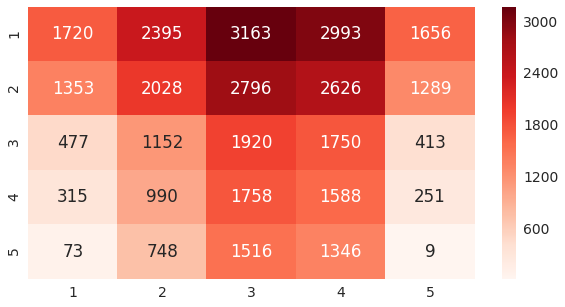

In [86]:
df_cm = pd.DataFrame(contingency_table, range(1,6),
                  range(1,6))
plt.figure(figsize = (10,5))
seaborn.heatmap(df_cm, annot=True, fmt='g', cmap='Reds')
plt.show()

# Bar plot with no of problems which are rated

In [80]:
no_of_problems_with_difficulty_rating = 0
no_of_problems_with_quality_rating = 0
no_of_problems_with_tags = 0
for i in range(data.shape[0]):
    if ast.literal_eval(data.iloc[i]["difficulty"]):
        no_of_problems_with_difficulty_rating+=1
    if ast.literal_eval(data.iloc[i]["quality"]):
        no_of_problems_with_quality_rating+=1
    if ast.literal_eval(data.iloc[i]["tags"]):
        no_of_problems_with_tags+=1

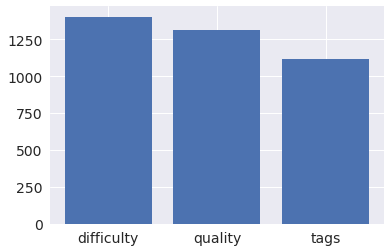

In [84]:
plt.bar(["difficulty","quality","tags"],[no_of_problems_with_difficulty_rating,no_of_problems_with_quality_rating,no_of_problems_with_tags])
plt.show()

# problems count of ratings great that 5 and less than 5

In [87]:
difficulty_greater_than_five = no_of_problems_with_diff_rating[5]
difficulty_lesser_than_five = no_of_problems_with_diff_rating[1]+no_of_problems_with_diff_rating[2]+no_of_problems_with_diff_rating[3]+no_of_problems_with_diff_rating[4]
quality_greater_than_five = no_of_problems_quality_rating[5]

quality_lesser_than_five = no_of_problems_quality_rating[1]+no_of_problems_quality_rating[2]+no_of_problems_quality_rating[3]+no_of_problems_quality_rating[4]

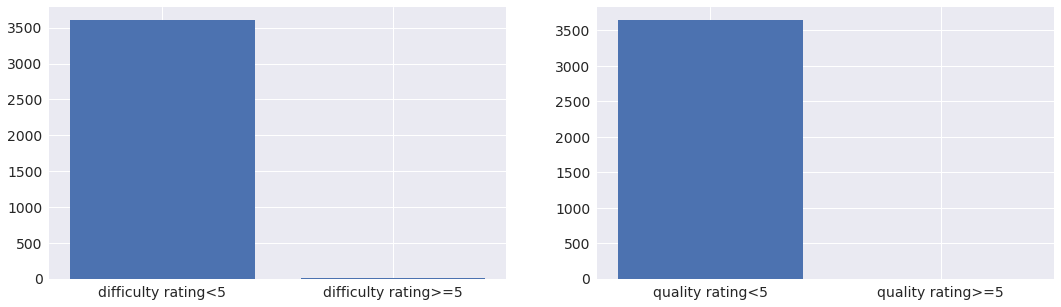

In [94]:
fig = plt.figure(figsize=(18, 5)) 
plt.subplot(121)
plt.bar(["difficulty rating>=5","difficulty rating<5"],[difficulty_greater_than_five,difficulty_lesser_than_five])
plt.subplot(122)
plt.bar(["quality rating>=5","quality rating<5"],[quality_greater_than_five,quality_lesser_than_five])
plt.show()